In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Data Analyst Nanodegree
##Project 1: Test a Perceptual Phenomenon

####1. What is our independent variable? What is our dependent variable?

Independent variable: Word condition (i.e. Congruent or Incongruent), Dependent variable: Response time

####2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null Hypothesis: There 'is no significant difference' in the population average response time viewing words which are congruent compared to average response time viewing words which are incongruent.

Alternative Hypothesis: There 'is a significant difference' in the population average response time viewing words which are congruent compared to average response time viewing words with are incongruent.

Expect to perform a paired-samples t-test as the same group of subjects have been assigned different word conditions from two different tests (matched pairs of similar units). Doing so would allow for increased statistical power compared to an ordinary unpaired test. (see: https://en.wikipedia.org/wiki/Paired_difference_test)

After taking the online test, I expect there will be a statistically significant difference between average response times of the two conditions, as the second condition took notably longer to complete.

####3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
import pandas as pd

In [3]:
path = r'data\stroopdata.csv'
dataFrame = pd.read_csv(path)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [7]:
print "Congruent mean:"
dataFrame['Congruent'].mean()

Congruent mean:


14.051125000000004

In [8]:
print "Congruent standard deviation:"
dataFrame['Congruent'].std()

Congruent standard deviation:


3.559357957645195

In [9]:
print "Incongruent mean:"
dataFrame['Incongruent'].mean()

Incongruent mean:


22.01591666666667

In [10]:
print "Incongruent standard deviation:"
dataFrame['Incongruent'].std()

Incongruent standard deviation:


4.797057122469138

####4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


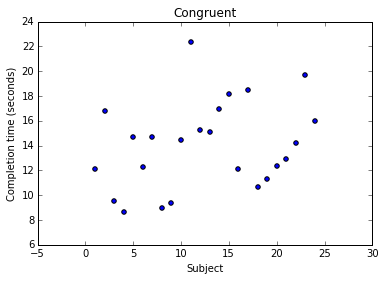

In [11]:
dataFrame['Subject'] = dataFrame.index + 1
get_ipython().magic(u'pylab inline')

pylab.title('Congruent')
plt.ylabel('Completion time (seconds)')
plt.xlabel('Subject')
plt.scatter(x = dataFrame['Subject'], y = dataFrame['Congruent'])
            # title="")

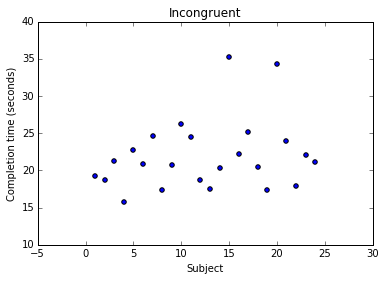

In [12]:
pylab.title('Incongruent')
plt.ylabel('Completion time (seconds)')
plt.xlabel('Subject')
plt.scatter(x = dataFrame['Subject'], y = dataFrame['Incongruent'])
            # title="")

The congruent words sample ranges between ~8 and ~22 seconds, while the incongruent words sample ranges between ~15 and ~35 seconds.

It is worth pointing out the two longest completion time samples (~34 & ~35) of the incongruent sample could be labeled as outliers from the wider sample set. These outliers will somewhat bias both the mean and standard deviation measures reported earlier, however the wider sample set confirms the greater reported mean.

####5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [13]:
n = len(dataFrame)

print "Number of observations:"
n

Number of observations:


24

In [11]:
#### df = n - 1 = 23
#### t-critical values (two sided) for 90% confidence level:
#### 1.714 (see: https://en.wikipedia.org/wiki/Student's_t-distribution#Table_of_selected_values)

In [14]:
#### Difference
dataFrame['Diff'] = dataFrame['Incongruent'] - dataFrame['Congruent']

#### Difference from mean
difffrommean = dataFrame['Diff'] - dataFrame['Diff'].mean()

#### Squared differences
dataFrame['SqDiff'] = difffrommean * difffrommean

#### Sum of squared differences
sumsquareddiff = dataFrame['SqDiff'].sum()

#### Sample statistic
v = sumsquareddiff / (n - 1)
s = sqrt(v)

print "Sample statistic:"
s

Sample statistic:


4.8648269103590556

In [15]:
#### Point estimate
pointtest = dataFrame['Incongruent'].mean() - dataFrame['Congruent'].mean()

#### t-statistic
t = pointtest / (s / sqrt(n))

print "t-statistic:"
t

t-statistic:


8.0207069441099552

We reject the Null Hypothesis that there 'is no significant difference' in population average response time viewing words which  are congruent compared to average response time viewing words which are incongruent (8.021 > 1.714).

This result is in-line with my expectations after taking the online test, which showed that the second condition took longer to complete.